In [1]:
import pandas as pd
import os
from scipy.misc import imread
import cv2

In [2]:
dataset=pd.read_excel("EvaluationSet/DigitalBlurSet.xlsx")

In [3]:
dataset.head()

,MyDigital Blur,Unnamed: 1
0,DiskR10_1.jpg,1
1,DiskR10_10.jpg,1
2,DiskR10_11.jpg,1
3,DiskR10_12.jpg,1
4,DiskR10_13.jpg,1


In [4]:
def variance_of_laplacian(image):
   
    return cv2.Laplacian(image, cv2.CV_64F).var()


In [5]:
# loop over the input images
def blur_notblur(imagePath):
   
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    text = -1
 
    if fm < 40:
        text = 1
    return text

In [6]:
from scipy.misc import imresize

temp_pred=[]
temp_orig=[]
for index, row in dataset.iterrows():
    img_name=row["MyDigital Blur"]
    img_path=os.path.join('EvaluationSet/DigitalBlurSet',img_name)
    temp_pred.append(blur_notblur(img_path[:-1]))
    temp_orig.append(row[1])

import numpy as np

prediction=np.stack(temp_pred)
original=np.stack(temp_orig)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(original,prediction)

0.9645833333333333

In [10]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, threshold=roc_curve(original,prediction)
roc_auc = metrics.auc(fpr, tpr)

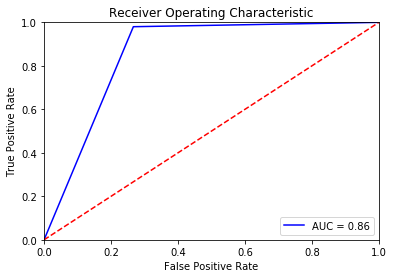

None


In [11]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print plt.show()